### Ajax team

Analyse Ajax team and propose which players to transfer and which players to buy

#### Approach
1. Overall data exploration to see the team's situation
2. Data clean up in order to eliminate the noise in our data set
3. Identify the areas of the team that requires improvements
4. Find which players got the minimum value for the team at the moment
5. Suggest which players could be added to the team which will make the team stronger

In [2]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
data = pd.read_csv('Fifa 23 Players Data.csv')
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


### Data Exploration

The goal is to get an overview of the team situation

In [24]:
# Checking which columns we have in our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [25]:
# Looking at the clubs that are available in the data set
pd.unique(data['Club Name'])

array(['Paris Saint-Germain', 'Real Madrid CF', 'FC Barcelona',
       'Manchester City', 'Liverpool', 'FC Bayern München',
       'Manchester United', 'Tottenham Hotspur', 'Atlético de Madrid',
       'Chelsea', 'AC Milan', 'Lazio', 'Inter', 'Roma', 'Juventus',
       'Eintracht Frankfurt', 'Villarreal CF', 'RB Leipzig',
       'Borussia Dortmund', 'Real Betis Balompié', 'RC Celta de Vigo',
       'Sevilla FC', 'Leicester City', 'Bayer 04 Leverkusen',
       'Borussia Mönchengladbach', 'Galatasaray SK',
       'Club Nacional de Football', 'Ajax', 'U.S. Sassuolo Calcio',
       'Arsenal', 'Aston Villa', 'AS Monaco', 'Toronto FC',
       'VfL Wolfsburg', 'Athletic Club de Bilbao', 'Newcastle United',
       'Los Angeles FC', 'AFC Richmond', 'West Ham United',
       'Real Sociedad', 'TSG Hoffenheim', 'Wolverhampton Wanderers',
       'Palmeiras', 'Napoli', 'PSV', 'Atalanta', 'OGC Nice', 'SL Benfica',
       'Getafe CF', 'Al Nassr', 'Valencia CF', 'FC Porto',
       'Sport-Club Freiburg'

In [4]:
# Picking players that are part of Ajax club
ajax = data[data['Club Name'] == 'Ajax']
ajax.head(30)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
97,D. Tadić,Dušan Tadić,84,84,26500000,"LW,CF,CAM",LW,Serbia,https://cdn.sofifa.net/players/199/434/23_60.png,33,...,84,83,84,69,68,69,64,58,64,23
272,S. Berghuis,Steven Berghuis,82,82,29500000,"CAM,RW",CAM,Netherlands,https://cdn.sofifa.net/players/200/260/23_60.png,30,...,82,81,82,68,66,68,63,54,63,21
346,L. Ocampos,Lucas Ocampos,81,81,27500000,"RW,LW",RW,Argentina,https://cdn.sofifa.net/players/205/632/23_60.png,27,...,81,81,81,76,75,76,74,71,74,20
396,E. Álvarez,Edson Álvarez,80,84,27500000,"CDM,CM",CB,Mexico,https://cdn.sofifa.net/players/235/844/23_60.png,24,...,71,73,71,79,81,79,80,83,80,17
405,J. Timber,Jurriën Timber,80,88,44500000,"CB,RB",CB,Netherlands,https://cdn.sofifa.net/players/251/805/23_60.png,21,...,74,75,74,80,81,80,80,82,80,19
462,D. Blind,Daley Blind,80,80,13500000,"CB,LB,CDM",CDM,Netherlands,https://cdn.sofifa.net/players/190/815/23_60.png,32,...,76,80,76,80,80,80,79,80,79,22
481,S. Bergwijn,Steven Bergwijn,80,85,32000000,"LW,RW",CAM,Netherlands,https://cdn.sofifa.net/players/225/953/23_60.png,24,...,82,76,82,66,63,66,63,56,63,23
593,O. Wijndal,Owen Wijndal,79,83,24000000,LB,LWB,Netherlands,https://cdn.sofifa.net/players/236/572/23_60.png,22,...,79,78,79,80,79,80,79,75,79,20
641,D. Klaassen,Davy Klaassen,79,79,17000000,"CAM,CM",CAM,Netherlands,https://cdn.sofifa.net/players/203/483/23_60.png,29,...,79,79,79,76,78,76,76,76,76,21
841,F. Grillitsch,Florian Grillitsch,78,80,15500000,"CDM,CB,CM",CM,Austria,https://cdn.sofifa.net/players/228/336/23_60.png,26,...,77,80,77,77,79,77,76,74,76,21


In [26]:
print('Mean age:', ajax['Age'].mean())
print('Mean Overall:', ajax['Overall'].mean())
print('Mean Value(in Euro):', ajax['Value(in Euro)'].mean())

Mean age: 23.62962962962963
Mean Overall: 74.37037037037037
Mean Value(in Euro): 13136111.111111112


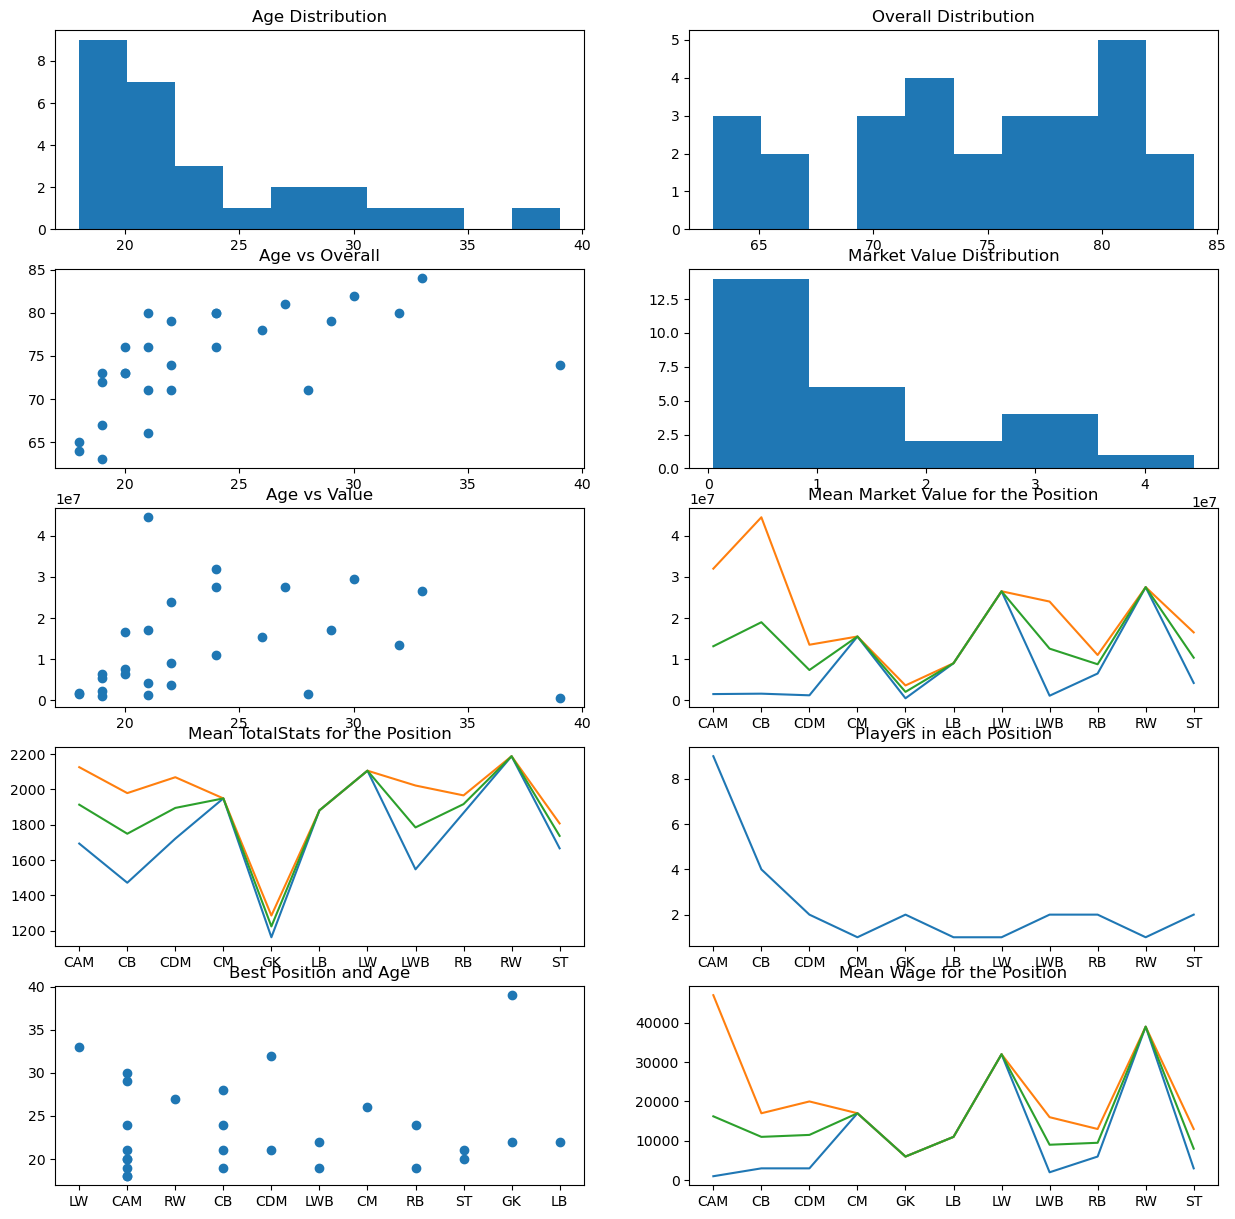

In [37]:
# Some visualisations to see overall team status
f, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
ax[0,0].hist(ajax['Age'], bins=10)
ax[0,0].set_title('Age Distribution')

ax[0,1].hist(ajax['Overall'], bins=10)
ax[0,1].set_title('Overall Distribution')

ax[1,0].scatter(ajax['Age'], ajax['Overall'])
ax[1,0].set_title('Age vs Overall')

ax[1,1].hist(ajax['Value(in Euro)'], bins=5)
ax[1,1].set_title('Market Value Distribution')

ax[2,0].scatter(ajax['Age'], ajax['Value(in Euro)'])
ax[2,0].set_title('Age vs Value')

ax[2,1].plot(ajax.groupby('Best Position').agg({'Value(in Euro)': ['min', 'max', 'mean']}))
ax[2,1].set_title('Mean Market Value for the Position')

ax[3,0].plot(ajax.groupby('Best Position').agg({'TotalStats': ['min', 'max', 'mean']}))
ax[3,0].set_title('Mean TotalStats for the Position')

ax[3,1].plot(ajax.groupby('Best Position').agg({'Known As': 'count'}))
ax[3,1].set_title('Players in each Position')

ax[4,0].scatter(ajax['Best Position'], ajax['Age'])
ax[4,0].set_title('Best Position and Age')

ax[4,1].plot(ajax.groupby('Best Position').agg({'Wage(in Euro)': ['min', 'max', 'mean']}))
ax[4,1].set_title('Mean Wage for the Position')
plt.show()

#### Some Findings based on the above charts
1. Overall, it is a very young team with mean age of 23
2. There is big disparity in terms of players that are best for certain positions, for example, big group of players are there for CAM, where as other positions like CM or LW and RW just have single player that is good in that position.
3. The GoalKeeper of the team is at the highest age group, and the team needs to think about a third goal keeper to ensure there is enough redundancy in case of current GK retires
4. There is a player in the team, that has double market value than others
5. Some players in CAM position are being paid way highers than others on the same position (or the rest of the team)


### Data Clean up

In [5]:
# Removing unwanted columns
req_columns = [
    'Known As', 'Overall', 'Value(in Euro)','Best Position',
    'Nationality','Age','TotalStats','Club Name','Wage(in Euro)','Release Clause',
    'Contract Until','ST Rating',
 'LW Rating',
 'LF Rating',
 'CF Rating',
 'RF Rating',
 'RW Rating',
 'CAM Rating',
 'LM Rating',
 'CM Rating',
 'RM Rating',
 'LWB Rating',
 'CDM Rating',
 'RWB Rating',
 'LB Rating',
 'CB Rating',
 'RB Rating',
 'GK Rating'
]

drop_columns = [i for i in data.columns.tolist() if i not in req_columns]
drop_columns

['Full Name',
 'Potential',
 'Positions Played',
 'Image Link',
 'Height(in cm)',
 'Weight(in kg)',
 'BaseStats',
 'Club Position',
 'Club Jersey Number',
 'Joined On',
 'On Loan',
 'Preferred Foot',
 'Weak Foot Rating',
 'Skill Moves',
 'International Reputation',
 'National Team Name',
 'National Team Image Link',
 'National Team Position',
 'National Team Jersey Number',
 'Attacking Work Rate',
 'Defensive Work Rate',
 'Pace Total',
 'Shooting Total',
 'Passing Total',
 'Dribbling Total',
 'Defending Total',
 'Physicality Total',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Dribbling',
 'Curve',
 'Freekick Accuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeper Diving',
 'Goa

In [6]:
data = data.drop(columns=drop_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Known As        18539 non-null  object
 1   Overall         18539 non-null  int64 
 2   Value(in Euro)  18539 non-null  int64 
 3   Best Position   18539 non-null  object
 4   Nationality     18539 non-null  object
 5   Age             18539 non-null  int64 
 6   TotalStats      18539 non-null  int64 
 7   Club Name       18539 non-null  object
 8   Wage(in Euro)   18539 non-null  int64 
 9   Release Clause  18539 non-null  int64 
 10  Contract Until  18539 non-null  object
 11  ST Rating       18539 non-null  int64 
 12  LW Rating       18539 non-null  int64 
 13  LF Rating       18539 non-null  int64 
 14  CF Rating       18539 non-null  int64 
 15  RF Rating       18539 non-null  int64 
 16  RW Rating       18539 non-null  int64 
 17  CAM Rating      18539 non-null  int64 
 18  LM Rat

In [7]:
ajax = ajax.drop(columns=drop_columns)
ajax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 97 to 12125
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Known As        27 non-null     object
 1   Overall         27 non-null     int64 
 2   Value(in Euro)  27 non-null     int64 
 3   Best Position   27 non-null     object
 4   Nationality     27 non-null     object
 5   Age             27 non-null     int64 
 6   TotalStats      27 non-null     int64 
 7   Club Name       27 non-null     object
 8   Wage(in Euro)   27 non-null     int64 
 9   Release Clause  27 non-null     int64 
 10  Contract Until  27 non-null     object
 11  ST Rating       27 non-null     int64 
 12  LW Rating       27 non-null     int64 
 13  LF Rating       27 non-null     int64 
 14  CF Rating       27 non-null     int64 
 15  RF Rating       27 non-null     int64 
 16  RW Rating       27 non-null     int64 
 17  CAM Rating      27 non-null     int64 
 18  LM Ratin

In [30]:
# Save cleaned data for future use
data.to_csv('cleaned_data.csv')

In [8]:
gk = data[data['Best Position'] == 'GK']
print('Overall GK population data:')
print('Median overall scope of GK:', gk['Overall'].median())
print('Mean age of GK:', gk['Age'].mean())
print('Median age of GK:', gk['Age'].median())
print('Median wage of GK:', gk['Wage(in Euro)'].median())

Overall GK population data:
Median overall scope of GK: 64.0
Mean age of GK: 26.09946627850558
Median age of GK: 25.0
Median wage of GK: 2000.0


In [9]:
ajax[ajax['Best Position'] == 'GK'][['Overall', 'Age', 'Wage(in Euro)']].head()

,Overall,Age,Wage(in Euro)
2156,74,39,6000
4104,71,22,6000


Based on above data, our desired age limiting factor could be a goal keeper that is between 24 to 29 years old. This will ensure we can have an experienced goal keeper which can be inside the team for the years to come, and can also bring the experience that the team needs, in case the 39 years old goal keeper wants to retire.

In [10]:
desired_gk = gk[(gk['Age'] >= 24) & (gk['Age'] <= 29)]
desired_gk.shape

(719, 28)

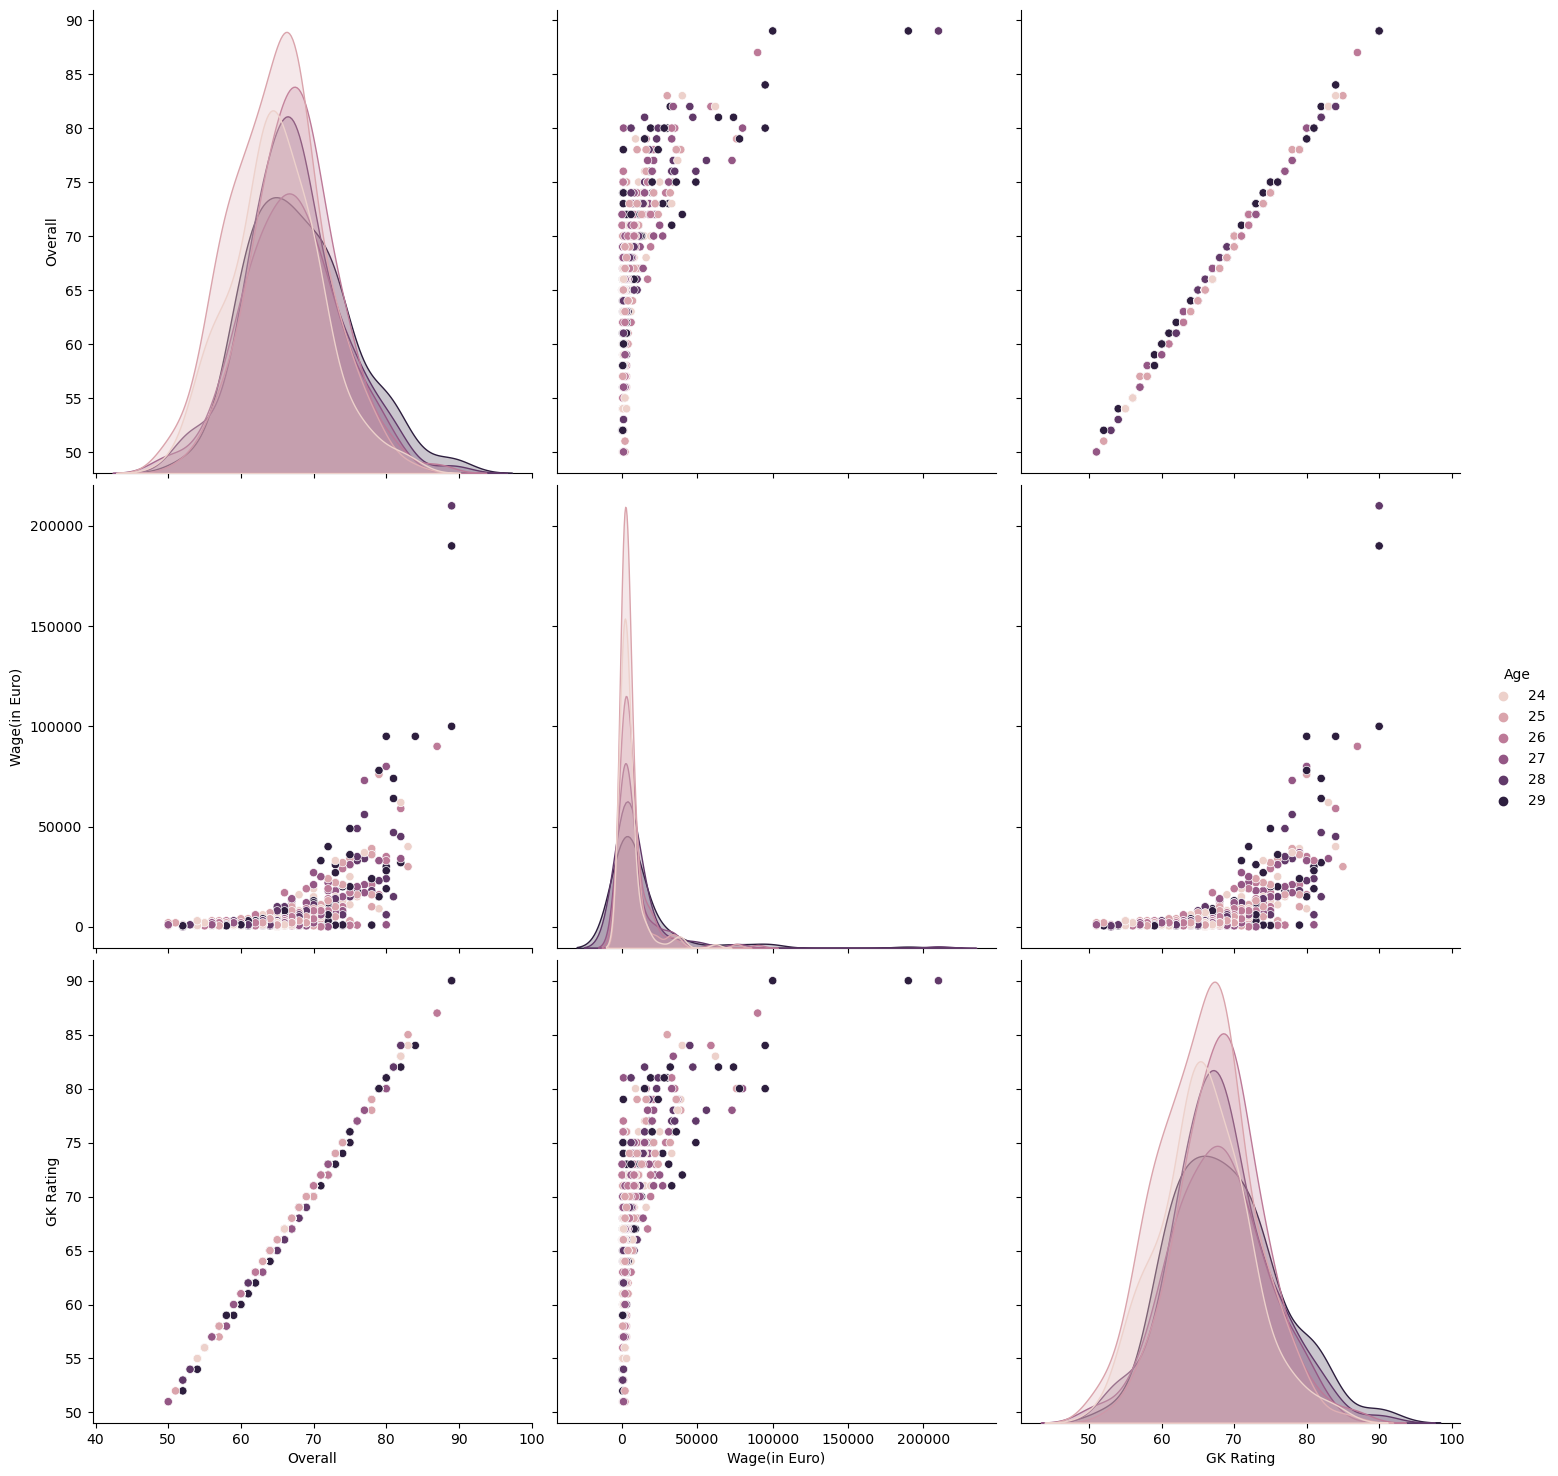

In [11]:
sns.pairplot(desired_gk[['Age','Overall', 'Wage(in Euro)','GK Rating']],hue='Age',height=5)

#### Looking at Wage factor

To reduce the list of potential goal keepers, we need to check what is the affordable wage we can pay. Current goalkeepers are having wage around 6K.

In [13]:
ajax['Wage(in Euro)'].mean()

13962.962962962964

In [14]:
# We limit our GK group to have wage below 15K
desired_gk = desired_gk[desired_gk['Wage(in Euro)']<15000]
desired_gk.shape

(624, 28)

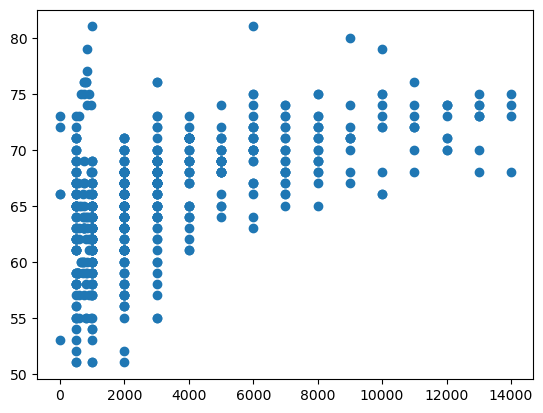

In [15]:
plt.scatter(desired_gk['Wage(in Euro)'], desired_gk['GK Rating'])
plt.show()

#### Overall rating factor

We are looking for goal keepers that are having similar overall rating as our GK, or better. So we will look for GKs with overall rating more than 74

In [16]:
desired_gk = desired_gk[desired_gk['Overall']>74]
desired_gk.shape

(13, 28)

In [20]:
desired_gk.head(13)

,Known As,Overall,Value(in Euro),Best Position,Nationality,Age,TotalStats,Club Name,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
413,D. Livaković,80,20500000,GK,Croatia,27,1319,Dinamo Zagreb,1000,46600000,...,38,42,38,34,39,34,34,34,34,81
463,A. Cragno,80,16500000,GK,Italy,28,1219,AC Monza,6000,0,...,30,32,30,29,31,29,28,28,28,81
581,J. Bijlow,79,22500000,GK,Netherlands,24,1236,Feyenoord,9000,38300000,...,33,35,33,28,32,28,28,28,28,80
706,G. Vicario,78,15500000,GK,Italy,25,1060,Empoli,10000,29100000,...,26,30,26,23,27,23,23,25,23,79
777,S. Rochet,78,11500000,GK,Uruguay,29,1211,Club Nacional de Football,850,26200000,...,31,30,31,30,30,30,30,29,30,79
1183,J. Staněk,76,7500000,GK,Czech Republic,26,1129,FC Viktoria Plzeň,850,17100000,...,28,26,28,27,26,27,27,27,27,77
1413,J. Graterol,75,7000000,GK,Venezuela,25,1077,América de Cali,3000,11200000,...,25,29,25,22,25,22,22,24,22,76
1435,B. Drągowski,75,6000000,GK,Poland,24,1217,Spezia,11000,11300000,...,33,36,33,31,32,31,30,29,30,76
1481,J. Graterol,75,7000000,GK,Venezuela,25,1077,América de Cali,3000,11200000,...,25,29,25,22,25,22,22,24,22,76
1509,G. Bushchan,75,5000000,GK,Ukraine,28,1022,Dynamo Kyiv,800,11400000,...,24,26,24,23,26,23,22,25,22,76


In [23]:
desired_gk.sort_values("Release Clause").head()

,Known As,Overall,Value(in Euro),Best Position,Nationality,Age,TotalStats,Club Name,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
463,A. Cragno,80,16500000,GK,Italy,28,1219,AC Monza,6000,0,...,30,32,30,29,31,29,28,28,28,81
1413,J. Graterol,75,7000000,GK,Venezuela,25,1077,América de Cali,3000,11200000,...,25,29,25,22,25,22,22,24,22,76
1481,J. Graterol,75,7000000,GK,Venezuela,25,1077,América de Cali,3000,11200000,...,25,29,25,22,25,22,22,24,22,76
1435,B. Drągowski,75,6000000,GK,Poland,24,1217,Spezia,11000,11300000,...,33,36,33,31,32,31,30,29,30,76
1509,G. Bushchan,75,5000000,GK,Ukraine,28,1022,Dynamo Kyiv,800,11400000,...,24,26,24,23,26,23,22,25,22,76


Above list can be the final list of goalkeepers that we can reach out in order to reach to an agreement for the transfer.